In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("Raj.csv")
df.head()

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,E,CYLINDERS,TRANSMISSION,FUEL,F,Unnamed: 9,Unnamed: 10,Unnamed: 11,C,CO2,SMOG
0,2017,ACURA,ILX,COMPACT,1.2,2,AM8,Z,5.2,5.6,6.7,16,150,5,6
1,2017,ACURA,ILX,COMPACT,2.4,4,AM8,Z,9.4,6.8,8.2,34,192,7,6
2,2017,ACURA,MDX SH-AWD,SUV - SMALL,3.5,6,AS9,Z,12.6,9.0,11.0,26,259,4,6
3,2017,ACURA,MDX SH-AWD ELITE,SUV - SMALL,3.5,6,AS9,Z,12.2,9.0,10.7,26,251,5,6
4,2017,ACURA,MDX HYBRID AWD,SUV - SMALL,3.0,6,AM7,Z,9.1,9.0,9.0,31,210,6,6


In [4]:
df.describe()

,MODEL,E,CYLINDERS,F,Unnamed: 9,Unnamed: 10,Unnamed: 11,C,CO2,SMOG
count,1057.0,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000
mean,2017.0,3.105487,5.538316,12.407190,8.971712,10.861306,27.679281,249.799432,4.838221,6.035951
std,0.0,1.376593,1.901131,3.385568,2.087350,2.767703,7.184018,58.445402,1.671207,0.936747
min,2017.0,0.900000,2.000000,4.200000,4.000000,4.100000,14.000000,96.000000,1.000000,2.000000
25%,2017.0,2.000000,4.000000,10.000000,7.500000,8.900000,23.000000,208.000000,4.000000,5.000000
50%,2017.0,3.000000,6.000000,11.900000,8.600000,10.400000,27.000000,242.000000,5.000000,6.000000
75%,2017.0,3.600000,6.000000,14.500000,10.200000,12.500000,32.000000,288.000000,6.000000,6.000000
max,2017.0,8.400000,12.000000,23.900000,18.500000,20.900000,69.000000,467.000000,10.000000,8.000000


In [5]:
cdf = df[['E','CYLINDERS','F','C']]
cdf.head(9)

,E,CYLINDERS,F,C
0,1.2,2,5.2,150
1,2.4,4,9.4,192
2,3.5,6,12.6,259
3,3.5,6,12.2,251
4,3.0,6,9.1,210
5,3.5,6,11.1,261
6,3.5,6,12.4,250
7,3.5,6,8.2,190
8,2.4,4,9.6,197


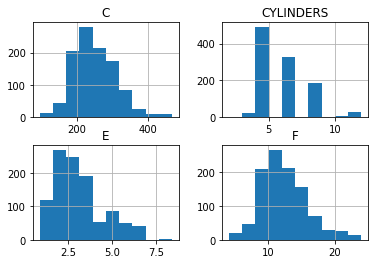

In [6]:
viz = cdf[['CYLINDERS','E','C','F']]
viz.hist()
plt.show()

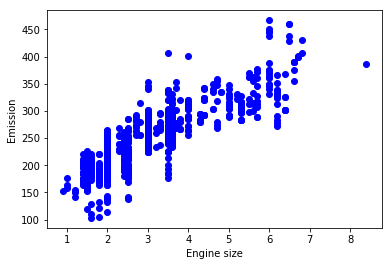

In [7]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
plt.scatter(train.E, train.C,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [8]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['E']])
train_y = np.asanyarray(train[['C']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[36.41893596]]
Intercept:  [137.3324387]


Text(0, 0.5, 'Emission')

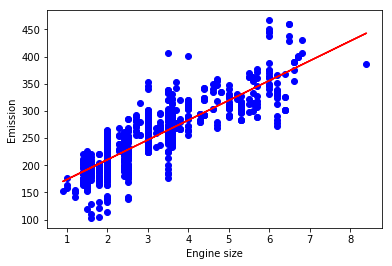

In [9]:
plt.scatter(train.E, train.C,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [10]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['E']])
test_y = np.asanyarray(test[['C']])
test_y_ = regr.predict(test_x)

print(test_y[2])
print(test_y_[2])
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )
regr.score(test_x,test_y)*100

[250]
[264.79871456]
Mean absolute error: 22.94
Residual sum of squares (MSE): 872.00
R2-score: 0.63


72.07472768328455